##Installing dependencies

In [1]:
!pip install balance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 5.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=1134576ee5801b1acafc43a508b0148308381bf59b9e555a51c8d175bdaf21a5
  Stored in directory: /root/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
!pip install glmnet_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.3/378.3 KB 7.8 MB/s eta 0:00:00


In [3]:
pip install session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing dependencies

In [4]:
import warnings
warnings.filterwarnings("ignore")

import balance

INFO (2023-02-07 22:37:20,829) [__init__/<module> (line 52)]: Using balance version 0.3.1


In [5]:
import pandas as pd
import numpy as np

## Data importation and exploration 

In [8]:
data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data[:2]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [9]:
round(data['DEATH_EVENT'].value_counts()/len(data)*100,2)

0    67.89
1    32.11
Name: DEATH_EVENT, dtype: float64

In [10]:
data.shape

(299, 13)

In [ ]:
target_data=data.sample(frac=0.1,axis=0).drop(['DEATH_EVENT'],axis=1)

In [ ]:
sample_data=data.drop(target_data.index,axis=0)
sample_data[:2]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [ ]:
target_data.reset_index(drop=False,inplace=True)

In [ ]:
target_data.rename(columns={'index':'id'},inplace=True)

In [ ]:
sample_data.reset_index(drop=False,inplace=True)
sample_data.rename(columns={'index':'id'},inplace=True)

In [ ]:
sample = balance.Sample.from_frame(sample_data, outcome_columns=["DEATH_EVENT"])
target = balance.Sample.from_frame(target_data)

WARNING (2023-01-27 12:30:11,361) [util/guess_id_column (line 111)]: Guessed id column name id for the data
WARNING (2023-01-27 12:30:11,363) [sample_class/from_frame (line 177)]: Casting id column to string
WARNING (2023-01-27 12:30:11,387) [sample_class/from_frame (line 234)]: No weights passed, setting all weights to 1
WARNING (2023-01-27 12:30:11,404) [util/guess_id_column (line 111)]: Guessed id column name id for the data
WARNING (2023-01-27 12:30:11,406) [sample_class/from_frame (line 177)]: Casting id column to string
WARNING (2023-01-27 12:30:11,432) [sample_class/from_frame (line 234)]: No weights passed, setting all weights to 1


In [ ]:
sample.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        269 non-null    object 
 1   age                       269 non-null    float64
 2   anaemia                   269 non-null    float64
 3   creatinine_phosphokinase  269 non-null    float64
 4   diabetes                  269 non-null    float64
 5   ejection_fraction         269 non-null    float64
 6   high_blood_pressure       269 non-null    float64
 7   platelets                 269 non-null    float64
 8   serum_creatinine          269 non-null    float64
 9   serum_sodium              269 non-null    float64
 10  sex                       269 non-null    float64
 11  smoking                   269 non-null    float64
 12  time                      269 non-null    float64
 13  DEATH_EVENT               269 non-null    float64
 14  weight    

In [ ]:
target.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        30 non-null     object 
 1   age                       30 non-null     float64
 2   anaemia                   30 non-null     float64
 3   creatinine_phosphokinase  30 non-null     float64
 4   diabetes                  30 non-null     float64
 5   ejection_fraction         30 non-null     float64
 6   high_blood_pressure       30 non-null     float64
 7   platelets                 30 non-null     float64
 8   serum_creatinine          30 non-null     float64
 9   serum_sodium              30 non-null     float64
 10  sex                       30 non-null     float64
 11  smoking                   30 non-null     float64
 12  time                      30 non-null     float64
 13  weight                    30 non-null     int64  
dtypes: float64(1

In [ ]:
sample_with_target = sample.set_target(target)

In [ ]:
sample_with_target

(balance.sample_class.Sample)

        balance Sample object with target set
        269 observations x 12 variables: age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
        id_column: id, weight_column: weight,
        outcome_columns: DEATH_EVENT
        
            target:
                 
	        balance Sample object
	        30 observations x 12 variables: age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
	        id_column: id, weight_column: weight,
	        outcome_columns: None
	        
            12 common variables: time,sex,creatinine_phosphokinase,serum_creatinine,high_blood_pressure,smoking,platelets,ejection_fraction,serum_sodium,age,diabetes,anaemia
            

## Comparison of the two samples

In [ ]:
print("Compare the means of covariates:\n",sample_with_target.covars().mean().T)

Compare the means of covariates:
 source                             self         target
age                           60.629494      58.555567
anaemia                        0.420074       0.466667
creatinine_phosphokinase     601.877323     502.633333
diabetes                       0.420074       0.466667
ejection_fraction             37.631970      39.366667
high_blood_pressure            0.345725       0.266667
platelets                 266542.664164  255369.136333
serum_creatinine               1.369480       1.202000
serum_sodium                 136.550186     136.766667
sex                            0.635688       0.666667
smoking                        0.312268       0.266667
time                         130.895911     122.500000


In [ ]:
print(sample_with_target.covars().asmd().T)

source                        self
age                       0.214309
anaemia                   0.091823
creatinine_phosphokinase  0.235609
diabetes                  0.091823
ejection_fraction         0.137422
high_blood_pressure       0.175772
platelets                 0.154680
serum_creatinine          0.349201
serum_sodium              0.043957
sex                       0.064612
smoking                   0.101386
time                      0.113777
mean(asmd)                0.147864


In [ ]:
print(sample_with_target.covars().asmd(aggregate_by_main_covar = True).T)

source                        self
age                       0.214309
anaemia                   0.091823
creatinine_phosphokinase  0.235609
diabetes                  0.091823
ejection_fraction         0.137422
high_blood_pressure       0.175772
mean(asmd)                0.147864
platelets                 0.154680
serum_creatinine          0.349201
serum_sodium              0.043957
sex                       0.064612
smoking                   0.101386
time                      0.113777


In [ ]:
sample_with_target.covars().plot()

## Use of CBPS

In [ ]:
# Using cbps to fit survey weights
adjusted_cbps = sample_with_target.adjust(method = "cbps")

INFO (2023-01-27 12:30:33,351) [cbps/cbps (line 409)]: Starting cbps function
INFO (2023-01-27 12:30:33,360) [adjustment/apply_transformations (line 255)]: Adding the variables: []
INFO (2023-01-27 12:30:33,363) [adjustment/apply_transformations (line 256)]: Transforming the variables: ['time', 'sex', 'creatinine_phosphokinase', 'serum_creatinine', 'high_blood_pressure', 'smoking', 'platelets', 'ejection_fraction', 'serum_sodium', 'age', 'diabetes', 'anaemia']
INFO (2023-01-27 12:30:33,402) [adjustment/apply_transformations (line 293)]: Final variables in output: ['time', 'sex', 'creatinine_phosphokinase', 'serum_creatinine', 'high_blood_pressure', 'smoking', 'platelets', 'ejection_fraction', 'serum_sodium', 'age', 'diabetes', 'anaemia']
INFO (2023-01-27 12:30:33,467) [cbps/cbps (line 460)]: The formula used to build the model matrix: ['time + smoking + sex + serum_sodium + serum_creatinine + platelets + high_blood_pressure + ejection_fraction + diabetes + creatinine_phosphokinase + an

In [ ]:
print(adjusted_cbps)


        Adjusted balance Sample object with target set using cbps
        269 observations x 12 variables: age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
        id_column: id, weight_column: weight,
        outcome_columns: DEATH_EVENT
        
            target:
                 
	        balance Sample object
	        30 observations x 12 variables: age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
	        id_column: id, weight_column: weight,
	        outcome_columns: None
	        
            12 common variables: time,sex,creatinine_phosphokinase,serum_creatinine,high_blood_pressure,smoking,platelets,ejection_fraction,serum_sodium,age,diabetes,anaemia
            


In [ ]:
print(adjusted_cbps.summary())

Covar ASMD reduction: -21.6%, design effect: 3.412
Covar ASMD (12 variables): 0.138 -> 0.168



In [ ]:
print(adjusted_cbps.covars().asmd().T)

source                        self  unadjusted  unadjusted - self
age                       0.050549    0.032966          -0.017583
anaemia                   0.216390    0.149855          -0.066536
creatinine_phosphokinase  0.074028    0.120398           0.046370
diabetes                  0.222079    0.179094          -0.042985
ejection_fraction         0.156691    0.143827          -0.012865
high_blood_pressure       0.288112    0.181200          -0.106912
platelets                 0.061660    0.095102           0.033442
serum_creatinine          0.249555    0.202869          -0.046686
serum_sodium              0.094682    0.047170          -0.047512
sex                       0.244401    0.181200          -0.063201
smoking                   0.173910    0.247582           0.073672
time                      0.178062    0.071792          -0.106270
mean(asmd)                0.167510    0.137754          -0.029755


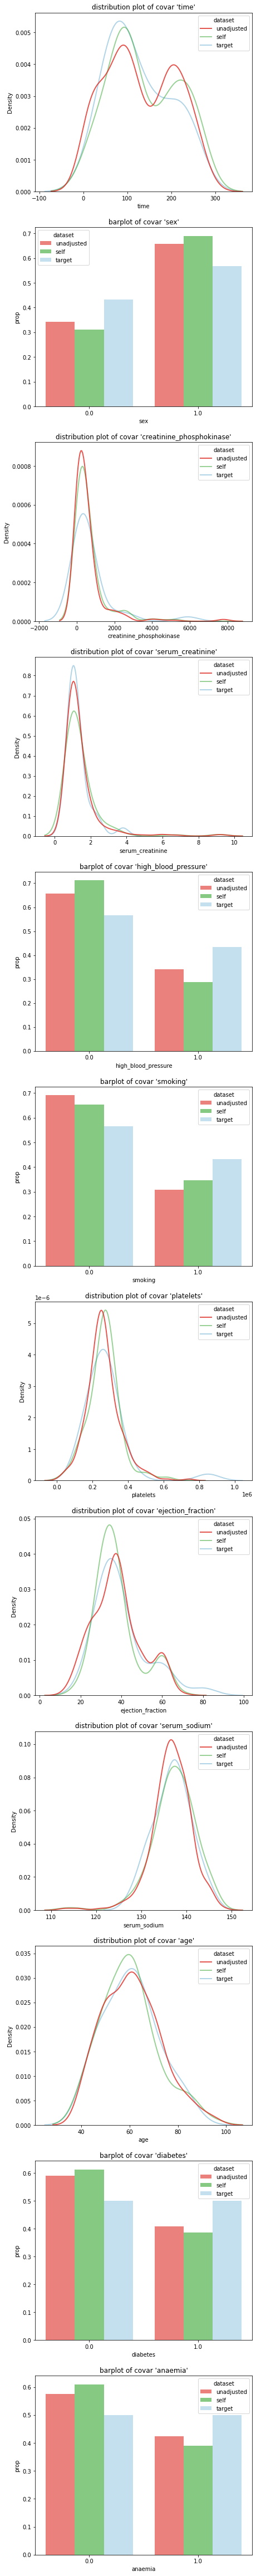

In [ ]:
adjusted_cbps.covars().plot(library = "seaborn", dist_type = "kde")

In [ ]:
print(adjusted_cbps.weights().design_effect())

3.41227299998478


WARNING (2023-01-27 12:34:36,355) [balancedf_class/target_response_rates (line 1307)]: Sample does not have target set


1 outcomes: ['DEATH_EVENT']
Mean outcomes:
            DEATH_EVENT
source                 
self           0.259022
unadjusted     0.338290

Response rates (relative to number of respondents in sample):
   DEATH_EVENT
n        269.0
%        100.0





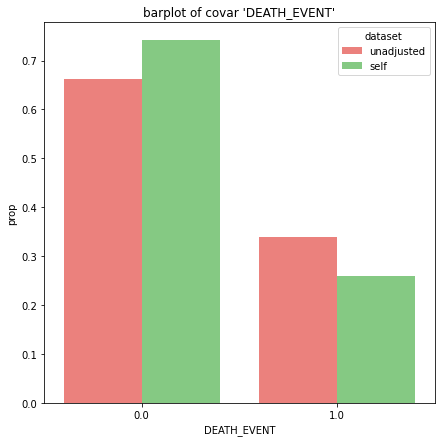

In [ ]:
print(adjusted_cbps.outcomes().summary())
adjusted_cbps.outcomes().plot()